#                                             CVS

### Data collection

In [215]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [216]:
tickers = ['CVS']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [217]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6867 entries, 1995-01-03 to 2022-04-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CVS     6867 non-null   float64
dtypes: float64(1)
memory usage: 107.3 KB


In [218]:
mydata.head()

,CVS
Date,
1995-01-03,4.515666
1995-01-04,4.497675
1995-01-05,4.515666
1995-01-06,4.515666
1995-01-09,4.479684


In [219]:
mydata.tail()

,CVS
Date,
2022-04-04,100.000000
2022-04-05,99.459999
2022-04-06,102.059998
2022-04-07,103.610001
2022-04-08,106.610001


### Normalization to 100:

In [220]:
mydata.iloc[0]

CVS    4.515666
Name: 1995-01-03 00:00:00, dtype: float64

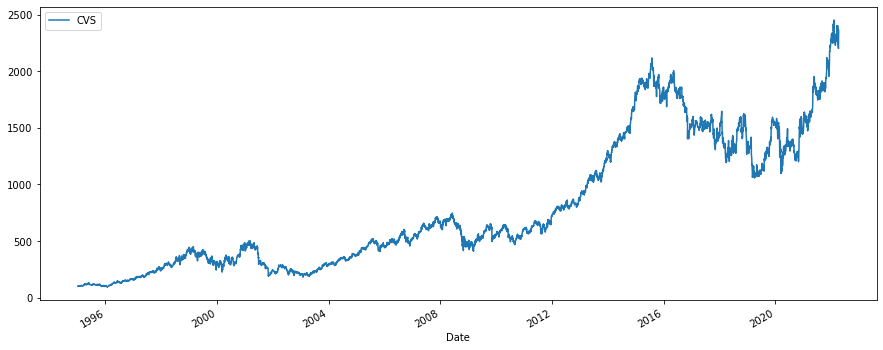

In [221]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Find a stock price based on the graph date:

In [222]:
mydata.loc['2019-09-26']

CVS    57.472229
Name: 2019-09-26 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [223]:
returns = (mydata / mydata.shift(1)) - 1
returns.tail()

,CVS
Date,
2022-04-04,-0.010782
2022-04-05,-0.005400
2022-04-06,0.026141
2022-04-07,0.015187
2022-04-08,0.028955


### Porfolio Weights:

In [224]:
weights = np.array([1])

In [225]:
np.dot(returns, weights)

array([        nan, -0.00398414,  0.00400008, ...,  0.02614115,
        0.01518718,  0.02895473])

***

## Average Annual Returns of the porfolio over past couple decades:

### CVS Stock:

In [226]:
annual_returns = returns.mean() * 250
annual_returns

CVS    0.161483
dtype: float64

### Total porfolio:

In [227]:
np.dot(annual_returns, weights)

0.16148301842692914

In [228]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 3) * 100) + ' %'
print (pfolio_1)

16.1 %


***

## Compare the risk between CVS and S&P500 index

In [229]:
tickers = ['CVS', 'VOO']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2011-1-1')['Adj Close']

In [230]:
returns = np.log(data / data.shift(1))
returns

,CVS,VOO
Date,,
2010-12-31,NaN,NaN
2011-01-03,0.008020,0.009337
2011-01-04,-0.000856,-0.000861
2011-01-05,0.010510,0.005325
2011-01-06,-0.010224,-0.001714
...,...,...
2022-04-04,-0.010841,0.008443
2022-04-05,-0.005415,-0.012439
2022-04-06,0.025805,-0.010180


### CVS

Daily risk:

In [231]:
returns['CVS'].std()

0.015012611160376175

Annual risk:

In [232]:
returns['CVS'].std() * 250 ** 0.5

0.23737022446626033

### S&P 500

Daily risk:

In [233]:
returns['VOO'].std()

0.010827405474946579

Annual risk:

In [234]:
returns['VOO'].std() * 250 ** 0.5

0.17119631225504184

******

### Volatility:

In [235]:
vols = returns[['CVS', 'VOO']].std() * 250 ** 0.5
vols

CVS    0.237370
VOO    0.171196
dtype: float64

***

# Calculating Porfolio Risk:

## Covariance and Correlation

In [236]:
cov_matrix = returns.cov()
cov_matrix

,CVS,VOO
CVS,0.000225,0.000091
VOO,0.000091,0.000117


In [237]:
cov_matrix_a = returns.cov() * 250
cov_matrix_a

,CVS,VOO
CVS,0.056345,0.022784
VOO,0.022784,0.029308


***

In [238]:
corr_matrix = returns.corr()
corr_matrix

,CVS,VOO
CVS,1.000000,0.560667
VOO,0.560667,1.000000


## Calculating Portfolio Risk

Equal weigthing scheme:

In [239]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [240]:
pfolio_var = np.dot(weights.T, np.dot(returns.cov() * 250, weights))
pfolio_var

0.03280508246780661

Portfolio Volatility:

In [241]:
pfolio_vol = (np.dot(weights.T, np.dot(returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.18112173383613192

In [242]:
print (str(round(pfolio_vol, 3) * 100) + ' %')

18.099999999999998 %


***

# Testing different weight combination for a porfolio. 

In [243]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['AAPL','OXY', 'CVS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [244]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.39295604, 0.5726716 , 0.03437237])

Expected Portfolio Return:

In [245]:
np.sum(weights * log_returns.mean()) * 250

0.1033859202428331

Expected Portfolio Variance:

In [246]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.11954691685346196

Expected Portfolio Volatility:

In [247]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.34575557385740285

In [248]:
pf_returns = []
pf_volatilities = []
weights_1 = []
weights_2 = []
weights_3 = []

In [249]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_1.append(weights[0])
    weights_2.append(weights[1])
    weights_3.append(weights[2])
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

In [250]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)
weights_1 = np.array(weights_1)
weights_2 = np.array(weights_2)
weights_3 = np.array(weights_3)


In [251]:
portfolios = pd.DataFrame({'Return' : pf_returns, 'Volatility' : pf_volatilities, 'WMT_weights' : weights_1, 'FB_weights': weights_2, 'BP_weights': weights_3})

In [252]:
portfolios.head()

,Return,Volatility,WMT_weights,FB_weights,BP_weights
0,0.070902,0.278305,0.159645,0.400380,0.439975
1,0.164752,0.214612,0.473028,0.016862,0.510110
2,0.080039,0.243468,0.147064,0.257744,0.595193
3,0.158474,0.219654,0.482195,0.116132,0.401673
4,0.092345,0.276029,0.265331,0.396029,0.338640


In [253]:
portfolios.tail()

,Return,Volatility,WMT_weights,FB_weights,BP_weights
995,0.032520,0.337569,0.035044,0.565936,0.399020
996,0.063405,0.250902,0.066514,0.264622,0.668864
997,0.141960,0.278700,0.502444,0.367829,0.129727
998,0.088442,0.254033,0.213909,0.318183,0.467908
999,0.036123,0.320302,0.032802,0.516333,0.450865


Text(0, 0.5, 'Expected Return')

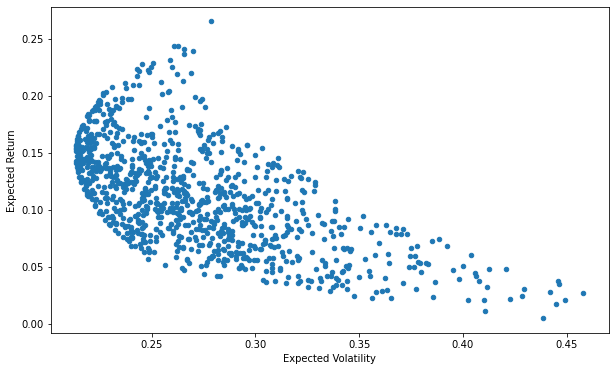

In [254]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

*****

# Assess if a stock is defensive or aggressive - Beta Value

In [255]:
import pandas as pd
import numpy as np 
from pandas_datareader import data as wb 
stockvsmarket = ['CVS', '^GSPC']
stock_data = pd.DataFrame()

for i in stockvsmarket:
    stock_data[i] = wb.DataReader(i, data_source = 'yahoo', start = '04-10-2017', end = '04-01-2022')['Adj Close']
    

In [256]:
stock_return = np.log(stock_data/stock_data.shift(1))

In [257]:
cov = stock_return.cov()*250

In [258]:
cov_with_market = cov.iloc[0,1]

In [259]:
market_var = stock_return['^GSPC'].var()*250

In [260]:
stock_beta = cov_with_market / market_var

stock_beta

0.7768772459102714

# Calculated expected return for a stock

In [261]:
expected_future_return = 0.0270 + stock_beta*0.05
expected_future_return

# 0.0270 = 10 years US treasury bond

0.06584386229551357

**Sharpe ratio:**

In [262]:
Sharpe_CVS = (expected_future_return - 0.0185)/(stock_return['CVS'].std()*250**0.5)
Sharpe_CVS

0.16583972028245786

# Monte Carlo- Predicting Gross Profit

In [263]:
import numpy as np 
import matplotlib.pyplot as plt

In [264]:
rev_m = 170
rev_stdev = 20 
iterations = 1000 

In [265]:
rev = np.random.normal(rev_m, rev_stdev, iterations)

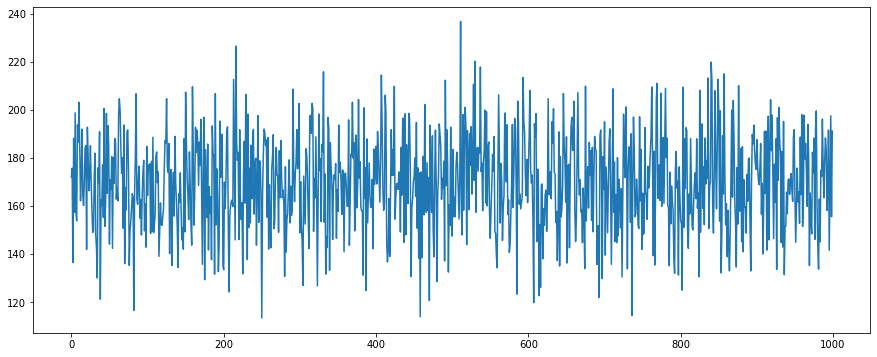

In [266]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

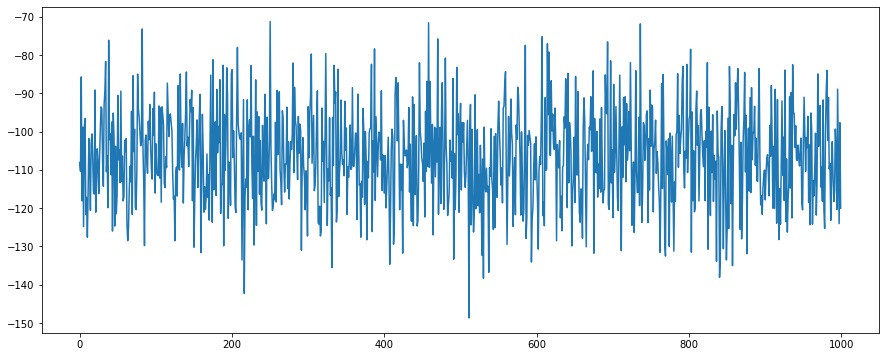

In [267]:
COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize =(15, 6))
plt.plot(COGS)
plt.show()


In [268]:
COGS.mean()

-106.5143527197027

In [269]:
COGS.std()

12.489049868008477

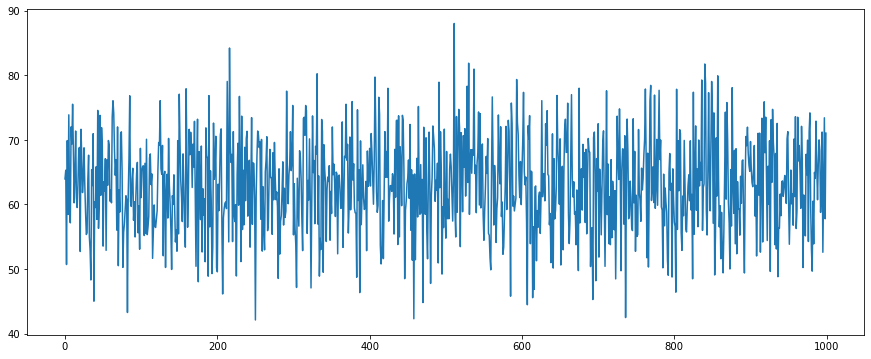

In [270]:
Gross_Profit = rev + COGS
Gross_Profit 

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [271]:
max(Gross_Profit)

87.99792044816667

In [272]:
min(Gross_Profit)

42.13797700239775

In [273]:
Gross_Profit.mean()

63.03444259341268

In [274]:
Gross_Profit.std()

7.390931614849191

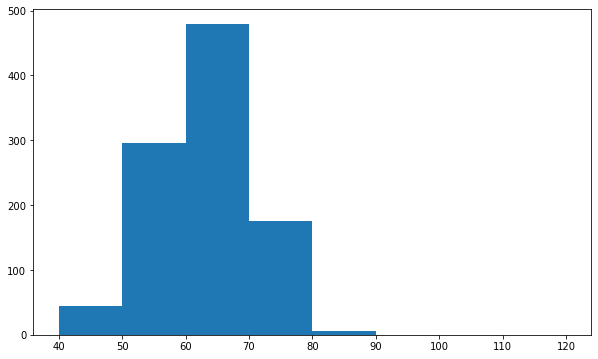

In [275]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.show()

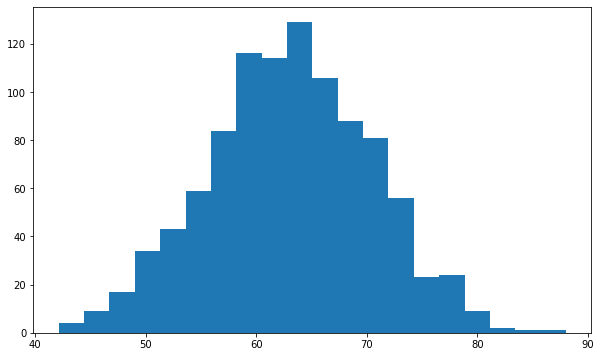

In [276]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

# Forcasting Stock Prices

In [277]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm
%matplotlib inline 

In [278]:
ticker = 'CVS'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start ='2010-1-1')['Adj Close']

In [279]:
log_return = np.log(1 + data.pct_change())

In [280]:
log_return.tail()

,CVS
Date,
2022-04-04,-0.010841
2022-04-05,-0.005415
2022-04-06,0.025805
2022-04-07,0.015073
2022-04-08,0.028543


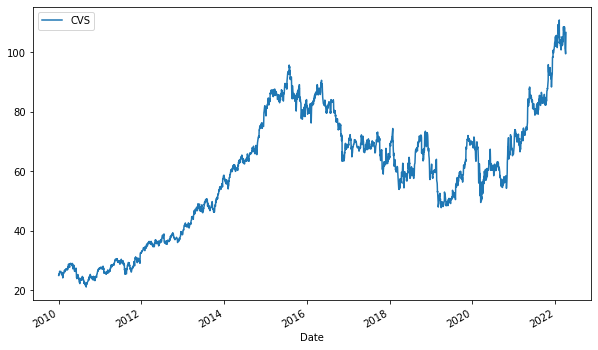

In [281]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

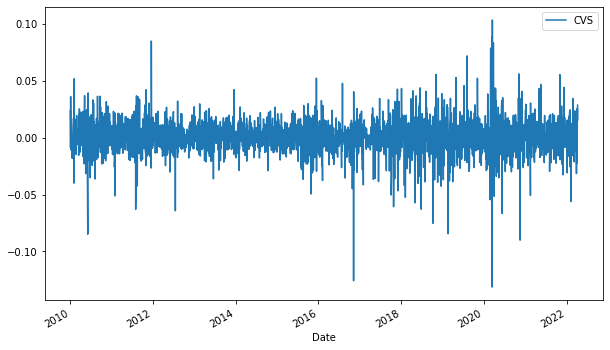

In [282]:
log_return.plot(figsize= (10, 6))

In [283]:
u = log_return.mean()
u

CVS    0.00047
dtype: float64

In [284]:
var = log_return.var()
var

CVS    0.000226
dtype: float64

In [285]:
drift = u - (0.5 * var)
drift

CVS    0.000357
dtype: float64

In [286]:
stdev = log_return.std()
stdev

CVS    0.015038
dtype: float64

In [287]:
type(drift)

pandas.core.series.Series

In [288]:
type(stdev)

pandas.core.series.Series

In [289]:
np.array(drift)

array([0.00035668])

In [290]:
drift.values

array([0.00035668])

In [291]:
stdev.values

array([0.01503762])

In [292]:
norm.ppf(0.95)

1.6448536269514722

In [293]:
x = np.random.rand(10,2)
x

array([[0.50282498, 0.46978021],
       [0.12963781, 0.30329411],
       [0.469226  , 0.70965671],
       [0.54869076, 0.83524777],
       [0.45026808, 0.15822028],
       [0.02315075, 0.33048639],
       [0.23064051, 0.08005189],
       [0.65972519, 0.69574509],
       [0.19884134, 0.71447775],
       [0.78998215, 0.53263882]])

In [294]:
norm.ppf(x)

array([[ 0.00708124, -0.07582238],
       [-1.12810491, -0.51494964],
       [-0.07721565,  0.55238213],
       [ 0.12235424,  0.9751125 ],
       [-0.12498408, -1.00179926],
       [-1.99263445, -0.4385705 ],
       [-0.7367391 , -1.40472264],
       [ 0.41171324,  0.51220175],
       [-0.84576709,  0.56651389],
       [ 0.80635931,  0.08190486]])

In [295]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.69818828,  0.2665251 ],
       [-0.05521556,  1.1278469 ],
       [ 0.08151314,  0.45441875],
       [-0.57100281, -1.56498977],
       [-0.58822466, -0.64263855],
       [ 0.19996881,  1.31048825],
       [-0.12414343,  1.91977517],
       [ 0.55256008,  1.21906645],
       [-0.58414705,  0.8726199 ],
       [ 0.15676354,  1.04357411]])

In [296]:
t_intervals = 1000
iterations = 10 

In [297]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [298]:
daily_returns

array([[1.00447753, 0.99100733, 0.98426663, ..., 1.03607615, 0.99248588,
        0.98989008],
       [1.02594887, 0.98484025, 1.04327168, ..., 0.9989303 , 0.98090044,
        0.99817171],
       [0.98517121, 0.97787492, 1.01253233, ..., 0.99935625, 1.00176078,
        0.99336935],
       ...,
       [1.01616897, 0.98896743, 1.00297939, ..., 1.02403725, 1.02612646,
        0.98317785],
       [0.99539041, 0.99055555, 1.00563363, ..., 1.00918527, 0.989676  ,
        1.03316343],
       [1.01206242, 0.99236966, 0.99270719, ..., 1.02098617, 0.98744312,
        0.98413459]])

In [299]:
S0 = data.iloc[-1]
S0

CVS    106.610001
Name: 2022-04-08 00:00:00, dtype: float64

In [300]:
price_list = np.zeros_like(daily_returns)

In [301]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [302]:
price_list[0] = S0
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [303]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1]* daily_returns[t]

In [304]:
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [109.37640969, 104.99381978, 111.22319398, ..., 106.49595986,
        104.57379694, 106.41508644],
       [107.75448961, 102.67082271, 112.6170798 , ..., 106.42740311,
        104.75792834, 105.70948553],
       ...,
       [116.51349632, 168.7207803 , 467.62426038, ..., 283.26827984,
        108.81080118, 165.9333425 ],
       [115.97641678, 167.1273059 , 470.25868088, ..., 285.87017605,
        107.6874388 , 171.43626128],
       [117.37537326, 165.85206814, 466.82917589, ..., 291.86949756,
        106.33522056, 168.71635522]])

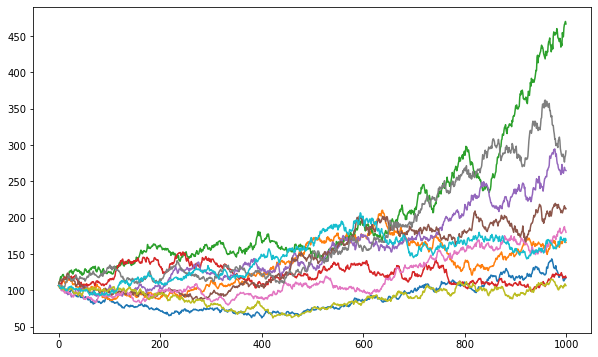

In [305]:
plt.figure(figsize=(10, 6))
plt.plot(price_list);